In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
Product_Identifier                4990 non-null object
Supermarket_Identifier            4990 non-null object
Product_Supermarket_Identifier    4990 non-null object
Product_Weight                    4188 non-null float64
Product_Fat_Content               4990 non-null object
Product_Shelf_Visibility          4990 non-null float64
Product_Type                      4990 non-null object
Product_Price                     4990 non-null float64
Supermarket_Opening_Year          4990 non-null int64
Supermarket _Size                 3540 non-null object
Supermarket_Location_Type         4990 non-null object
Supermarket_Type                  4990 non-null object
Product_Supermarket_Sales         4990 non-null float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [5]:
df =df.apply(lambda x:x.fillna(x.value_counts().index[0]))
#replace null values with the mode of each column

In [6]:
cats = df.select_dtypes(include=['object']).copy()


In [7]:
cats.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Fat_Content,Product_Type,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,Low Fat,Soft Drinks,Medium,Cluster 3,Grocery Store
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,Low Fat,Soft Drinks,High,Cluster 3,Supermarket Type1
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,Low Fat,Soft Drinks,Medium,Cluster 2,Supermarket Type1
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,Low Fat,Soft Drinks,Medium,Cluster 3,Supermarket Type2
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,Ultra Low fat,Soft Drinks,Small,Cluster 2,Supermarket Type1


In [8]:
t = cats.columns
for col in t:
    cats[col] = cats[col].astype('category')

In [9]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 8 columns):
Product_Identifier                4990 non-null category
Supermarket_Identifier            4990 non-null category
Product_Supermarket_Identifier    4990 non-null category
Product_Fat_Content               4990 non-null category
Product_Type                      4990 non-null category
Supermarket _Size                 4990 non-null category
Supermarket_Location_Type         4990 non-null category
Supermarket_Type                  4990 non-null category
dtypes: category(8)
memory usage: 300.8 KB


In [10]:
df2 = df.copy()

In [11]:
df2.drop(t,axis=1,inplace = True)

In [12]:
cats.drop('Product_Identifier',axis=1,inplace=True)

In [13]:
t = cats.columns

In [14]:
#use label encoding to convert categorical data to numerical representation
for col in t:
    cats[col] = cats[col].cat.codes

In [15]:
cats.head()

,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Fat_Content,Product_Type,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,0,0,0,14,1,2,0
1,1,1,0,14,0,2,1
2,2,2,0,14,1,1,1
3,3,3,0,14,1,2,2
4,6,4,2,14,2,1,1


In [16]:
dataset = pd.concat([df2,cats], axis=1)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
data = pd.DataFrame(scaled_data, columns=dataset.columns.values)

C:\Users\JO5H\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int8, int16, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [19]:
data.head()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Fat_Content,Product_Type,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,0.41947,0.208700,0.473772,0.541667,0.019178,0.000000,0.000000,0.0,0.933333,0.5,1.0,0.000000
1,0.41947,0.124583,0.470798,0.083333,0.193002,0.111111,0.000200,0.0,0.933333,0.0,1.0,0.333333
2,0.41947,0.125392,0.462302,0.916667,0.193002,0.222222,0.000401,0.0,0.933333,0.5,0.5,0.333333
3,0.41947,0.125194,0.469524,1.000000,0.062634,0.333333,0.000601,0.0,0.933333,0.5,1.0,0.666667
4,0.41947,0.000000,0.469099,0.791667,0.073498,0.666667,0.000802,1.0,0.933333,1.0,0.5,0.333333


In [20]:
x = data.drop('Product_Supermarket_Sales',axis=1)
y = data['Product_Supermarket_Sales']

In [21]:
from sklearn.model_selection import train_test_split as tts

In [22]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [23]:
x_train, x_test, y_train , y_test = tts(x,y,test_size=0.30, random_state = 42)

In [24]:
model = Sequential()
model.add(Dense(12, input_dim=11, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

Instructions for updating:
Use tf.cast instead.


In [26]:
history = model.fit(x_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Train on 2794 samples, validate on 699 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/150
2794/2794 [==============================] - 1s 342us/sample - loss: 0.0192 - mean_squared_error: 0.0192 - mean_absolute_error: 0.1059 - val_loss: 0.0150 - val_mean_squared_error: 0.0150 - val_mean_absolute_error: 0.0959
Epoch 2/150
2794/2794 [==============================] - 0s 42us/sample - loss: 0.0110 - mean_squared_error: 0.0110 - mean_absolute_error: 0.0801 - val_loss: 0.0114 - val_mean_squared_error: 0.0114 - val_mean_absolute_error: 0.0818

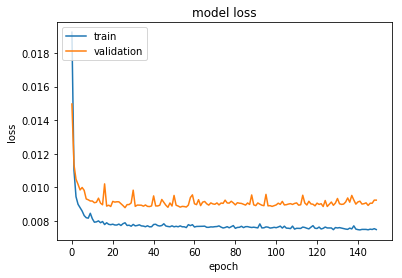

In [27]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [28]:
y_pred_ann = model.predict(x_test)

In [31]:
y_pred_ann

array([[0.0101237 ],
       [0.2200943 ],
       [0.2655403 ],
       ...,
       [0.09385088],
       [0.0902539 ],
       [0.16193864]], dtype=float32)

In [37]:
predANN = pd.DataFrame(list(zip(y_test,y_pred_ann)), columns  = ['ACTUAL', 'PREDICTED'] )
predANN

,ACTUAL,PREDICTED
0,0.046924,[0.0101237]
1,0.185759,[0.2200943]
2,0.097521,[0.2655403]
3,0.052943,[0.23064756]
4,0.244517,[0.29290524]
5,0.270223,[0.18187127]
6,0.006121,[0.012194414]
7,0.545241,[0.44496846]
8,0.220239,[0.17518035]
9,0.185249,[0.20217264]


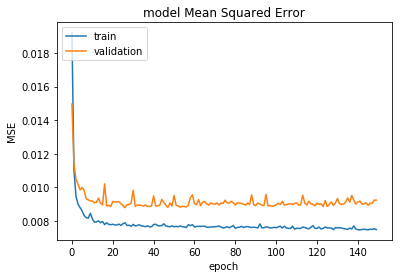

In [38]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [39]:
print(history.history.keys())

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])


In [40]:
print(history.history['mean_squared_error'][149])
#final mse after 150 epochs

0.0074953013


In [41]:
from sklearn.linear_model import LinearRegression as lr #import linear regression

In [42]:
lm = lr()

In [43]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
y_pred = lm.predict(x_test)

In [45]:
from sklearn.metrics import mean_squared_error as mse

In [47]:
predLR = pd.DataFrame(list(zip(y_test,y_pred)), columns  = ['ACTUAL', 'PREDICTED'] )
predLR

,ACTUAL,PREDICTED
0,0.046924,0.020281
1,0.185759,0.282801
2,0.097521,0.228560
3,0.052943,0.192913
4,0.244517,0.286053
5,0.270223,0.137535
6,0.006121,0.012205
7,0.545241,0.425738
8,0.220239,0.116975
9,0.185249,0.204397


In [49]:
mseANN = mse(y_test,y_pred_ann)
mseLR = mse(y_test,y_pred)

In [51]:
mseANN

0.00850820949591581

In [52]:
mseLR

0.009496355156598048

Text(0.5, 1.0, 'Linear Regression')

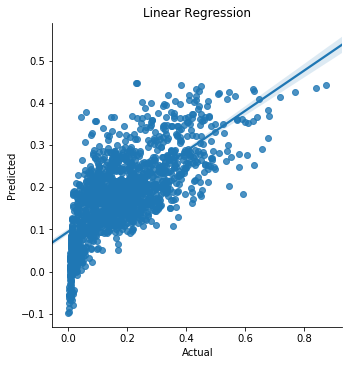

In [40]:
sns.lmplot('Actual','Predicted', pd.DataFrame(list(zip(y_test,y_pred)),columns=['Actual','Predicted']))
plt.title('Linear Regression')

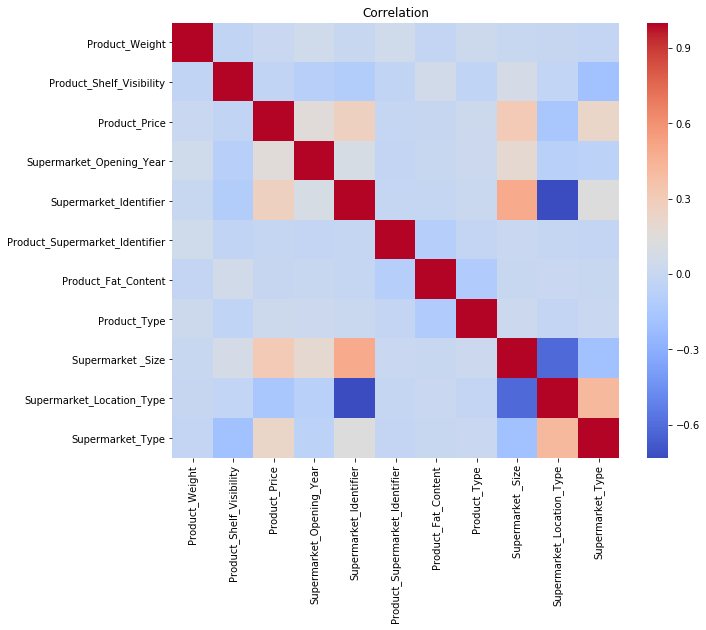

In [50]:
plt.figure(figsize=[10,8])
plt.title('Correlation')
sns.heatmap(x.corr(), cmap='coolwarm')